# InfoVis Projekt

In [1]:
import pandas as pd
import altair as alt
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

1.) Laden Sie Ihren Datensatz in das Notebook:

In [2]:
df = pd.read_csv("./heart_2020_cleaned.csv", sep=",")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
df.describe().style.background_gradient()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


2.) Kurze Beschreibung des Datensatzes: worum geht es und woher haben Sie den Datensatz (Link)?

Link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Der Datensatz enthält Informationen zu verschiedenen persönlichen Indikatoren, die mit Herzkrankheiten in Verbindung stehen können. Die Spalten enthalten Informationen über den Body Mass Index (BMI), Rauchen, Alkoholkonsum, Schlaganfall, körperliche und geistige Gesundheit, Schwierigkeiten beim Gehen, Geschlecht, Alterskategorie, Rasse, Diabetes, körperliche Aktivität, allgemeine Gesundheit, Schlafzeit, Asthma, Nierenerkrankungen und Hautkrebs. Der Zweck des Datensatzes besteht darin, Muster und Zusammenhänge zwischen diesen Indikatoren und Herzkrankheiten zu identifizieren und zu untersuchen.


Herzerkrankungen (HeartDisease): Zielmerkmal.<br>
BMI: Bewertet Übereinstimmung zwischen Masse und Größe.<br>
Rauchen (Smoking): Wesentlicher Risikofaktor für Herz-Kreislauf-Erkrankungen.<br>
Alkoholkonsum (AlcoholDrinking): Verursacht dauerhafte Störungen im Herz-Kreislauf-System.<br>
Schlaganfall (Stroke): Ischämische Schlaganfälle treten 4-mal häufiger auf als hämorrhagische. Eine der führenden Ursachen ist Herzerkrankung.<br>
Körperliche und psychische Gesundheit (PhysicalHealth, MentalHealth): Anzahl der Tage im Monat, an denen sich eine Person schlecht fühlt.<br>
Schwierigkeiten beim Gehen (DiffWalking): Probleme beim Treppensteigen.<br>
Geschlecht (Sex): Geschlecht einer Person.<br>
Alterskategorie (AgeCategory): Alterskategorie der Teilnehmer.<br>
Rasse (Race): ethnische Zugehörigkeit.<br>
Diabetes, Asthma, Nierenerkrankungen und Hautkrebs (Diabetic, Asthma, KidneyDisease, SkinCancer): bekannte medizinische Bedingungen, die spezifische Auswirkungen auf die Gesundheit haben können.<br>
Körperliche Aktivität (PhysicalActivity): Erwachsene, die in den letzten 30 Tagen körperliche Aktivität oder Übungen außerhalb ihrer regulären Arbeit ausgeübt haben.<br>
Allgemeine Gesundheit (GenHealth): Wohlbefinden.<br>
Schlafzeit (SleepTime): Anzahl der Schlafstunden.<br>

3.) Wie groß ist der Datensatz in Bezug auf Spalten und Zeilen? Welche Spalten und Zeilen sind relevant für das Projekt?

*Anmerkung: nicht benötigte Spalten können mittels `drop` entfernt werden.*

Original:   18 Spalten und 319795 Zeilen

Aus meiner Sicht besitzt jede Spalte aus diesem Datensatz potenziell wertvolle Informationen. Die Datenvisualisierung soll Auswirkungen auf eine Herzkrankheit aufzeigen, es könnte zwar sein, dass gewisse Spalten/Indikatoren keine signifikanten Auswirkungen auf eine Herzkrankheit haben, jedoch würde eine solche Analyse (welche Indikatoren Auswirkungen haben und welche nicht) den Rahmen dieser Lehrveranstaltung aus meiner Sicht sprengen.  

In [4]:
df.shape

(319795, 18)

4.) Gibt es fehlende Werte in dem Datensatz? Wenn ja: Wie gehen Sie damit um?

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<AxesSubplot:>

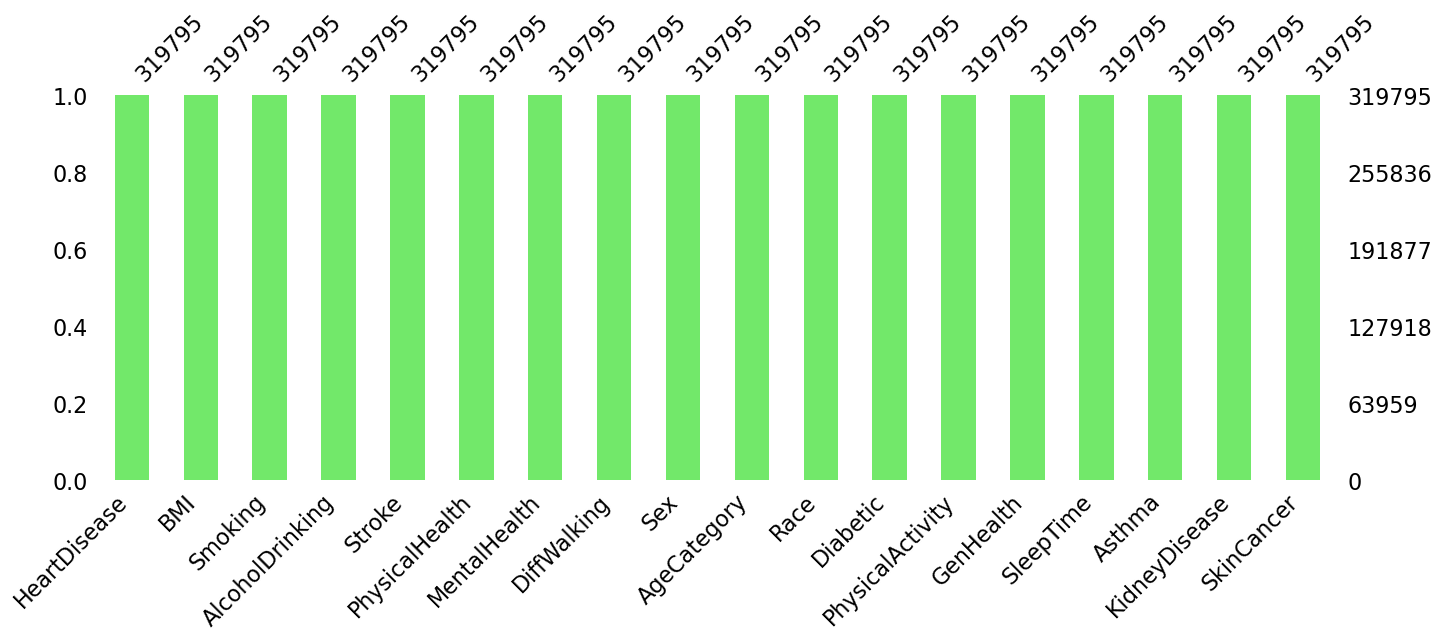

In [6]:
msno.bar(df, figsize = (16,5), color = "#72e86a")

Laut der oberen Überprüfung ist der Datensatz vollständig. Jedoch kann so noch nicht ausgeschlossen werden, dass die erhobenen Daten auch korrekt sind. Da ich inkorrekte Daten sowieso nicht identifizieren bzw. korrigieren könnte, wird der Datensatz als vollständig und korrekt betrachtet.

---

### Data Abstraction

5.) Welche Attributtypen können den einzelnen Spalten zugewiesen werden? Geben Sie für ordinale und nominale Daten an, wieviele Kategorien pro Spalte enthalten sind! Geben Sie für quantitative Daten den Wertebereich an (Minimum und Maximum)!

In [7]:
# show data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
# show attribute types
print("\nDie folgenden Eigenschaften des Datensatzes sind nominal: {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {} und {}."
      .format   (   df.columns[0],
                    df.columns[2],
                    df.columns[3],
                    df.columns[4],
                    df.columns[7],
                    df.columns[8],
                    df.columns[10],
                    df.columns[11],
                    df.columns[12],
                    df.columns[15],
                    df.columns[16],
                    df.columns[17]
                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[0], 
                                                                    len(df["HeartDisease"].unique()),
                                                                    df["HeartDisease"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[2], 
                                                                    len(df["Smoking"].unique()),
                                                                    df["Smoking"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[3], 
                                                                    len(df["AlcoholDrinking"].unique()),
                                                                    df["AlcoholDrinking"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[4], 
                                                                    len(df["Stroke"].unique()),
                                                                    df["Stroke"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[7], 
                                                                    len(df["DiffWalking"].unique()),
                                                                    df["DiffWalking"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[8], 
                                                                    len(df["Sex"].unique()),
                                                                    df["Sex"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[10], 
                                                                    len(df["Race"].unique()),
                                                                    df["Race"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[11], 
                                                                    len(df["Diabetic"].unique()),
                                                                    df["Diabetic"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[12], 
                                                                    len(df["PhysicalActivity"].unique()),
                                                                    df["PhysicalActivity"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[15], 
                                                                    len(df["Asthma"].unique()),
                                                                    df["Asthma"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[16], 
                                                                    len(df["KidneyDisease"].unique()),
                                                                    df["KidneyDisease"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[17], 
                                                                    len(df["SkinCancer"].unique()),
                                                                    df["SkinCancer"].unique()                                                   
                                                                ))


Die folgenden Eigenschaften des Datensatzes sind nominal: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, Asthma, KidneyDisease und SkinCancer.
Die Spalte HeartDisease enthält 2 verschiedene Werte: ['No' 'Yes'].
Die Spalte Smoking enthält 2 verschiedene Werte: ['Yes' 'No'].
Die Spalte AlcoholDrinking enthält 2 verschiedene Werte: ['No' 'Yes'].
Die Spalte Stroke enthält 2 verschiedene Werte: ['No' 'Yes'].
Die Spalte DiffWalking enthält 2 verschiedene Werte: ['No' 'Yes'].
Die Spalte Sex enthält 2 verschiedene Werte: ['Female' 'Male'].
Die Spalte Race enthält 6 verschiedene Werte: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'].
Die Spalte Diabetic enthält 4 verschiedene Werte: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'].
Die Spalte PhysicalActivity enthält 2 verschiedene Werte: ['Yes' 'No'].
Die Spalte Asthma enthält 2 verschiedene Werte: ['Yes' 'No'].
Die Spalte KidneyDisease enthält 

In [9]:
print("\nDie folgenden Eigenschaften des Datensatzes sind ordinal: {} und {}."
      .format   (   df.columns[9],
                    df.columns[13]
                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[9], 
                                                                    len(df["AgeCategory"].unique()),
                                                                    df["AgeCategory"].unique()                                                   
                                                                ))

print("Die Spalte {} enthält {} verschiedene Werte: {}.".format (   df.columns[13], 
                                                                    len(df["GenHealth"].unique()),
                                                                    df["GenHealth"].unique()    
                                                                ))


Die folgenden Eigenschaften des Datensatzes sind ordinal: AgeCategory und GenHealth.
Die Spalte AgeCategory enthält 13 verschiedene Werte: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'].
Die Spalte GenHealth enthält 5 verschiedene Werte: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'].


In [10]:
print("\nDie folgenden Eigenschaften des Datensatzes sind quantitative: {}, {}, {} und {}."
      .format   (   df.columns[1],
                    df.columns[5],
                    df.columns[6],
                    df.columns[14]
                ))

print("Der Wertebereich der Spalte {} reicht von {} bis {}.\n".format   (   df.columns[1], 
                                                                            df["BMI"].min(),
                                                                            df["BMI"].max()    
                                                                        ))

print("Der Wertebereich der Spalte {} reicht von {} bis {}.\n".format   (   df.columns[5], 
                                                                            df["PhysicalHealth"].min(),
                                                                            df["PhysicalHealth"].max()    
                                                                        ))

print("Der Wertebereich der Spalte {} reicht von {} bis {}.\n".format   (   df.columns[6], 
                                                                            df["MentalHealth"].min(),
                                                                            df["MentalHealth"].max()    
                                                                        ))

print("Der Wertebereich der Spalte {} reicht von {} bis {}.\n".format   (   df.columns[14], 
                                                                            df["SleepTime"].min(),
                                                                            df["SleepTime"].max()    
                                                                        ))


Die folgenden Eigenschaften des Datensatzes sind quantitative: BMI, PhysicalHealth, MentalHealth und SleepTime.
Der Wertebereich der Spalte BMI reicht von 12.02 bis 94.85.

Der Wertebereich der Spalte PhysicalHealth reicht von 0.0 bis 30.0.

Der Wertebereich der Spalte MentalHealth reicht von 0.0 bis 30.0.

Der Wertebereich der Spalte SleepTime reicht von 1.0 bis 24.0.



6.) Welche Datenstruktur(en) stecken in dem Datensatz? (z.B. hierarchisch, geografisch, temporal)

Der Datensatz ist eine flache (nicht hierarchische) und zeitunabhängige Datenstruktur. Es gibt keine Hierarchie zwischen den Daten und keine geografischen Informationen, die Informationen beinhalten würden, wo die Daten gesammelt wurden. Außerdem gibt es keine zeitbezogenen Informationen wie Datum oder Uhrzeit, die Aussagen, wann die Daten gesammelt wurden.

### Task Abstraction

7.) Welche Fragen können mit dem gewählten Datensatz untersucht werden?

*Anmerkung: Diese Fragen können in einem domänenspezifischen Format gestellt werden. Hinterfragen Sie hier auch: welche Fragen benötigen eine visuelle Analyse? Nicht nur Bestimmung von Anzahl und Min/Max*

- Wie hängen körperliche Aktivitäten und körperliche Gesundheit mit dem Risiko von Herzerkrankungen zusammen?
- Welche Auswirkungen hat das Rauchen auf das Risiko von Herzerkrankungen im Vergleich zum Alkoholkonsum?
- Welchen Einfluss hat das Alter auf das Risiko von Herzerkrankungen?
- Gibt es einen Zusammenhang zwischen der genetischen Gesundheit und dem Risiko von Herzerkrankungen?
- Wie beeinflussen bestimmte ethnische Gruppen das Risiko von Herzerkrankungen?
- Welche Rolle spielen Schlafstörungen bei der Entwicklung von Herzerkrankungen?
- Wie beeinflusst das Vorhandensein von Diabetes, Asthma oder Nierenerkrankungen das Risiko von Herzerkrankungen?
- Wie wirkt sich die mentale Gesundheit auf das Risiko von Herzerkrankungen aus?

8.) Welche abstrakten Aufgaben stecken in den Fragen? *(z.B. Finden von Ausreißern, Vergleich von mehreren Werten)*

- Bewertung von Risikofaktoren und deren Beitrag zum Gesamtrisiko von Herzerkrankungen
- Vergleich von mehreren Messungen oder Indikatoren, um das Risiko von Herzerkrankungen vorherzusagen oder zu verstehen
- Identifizierung von Ausreißern oder Abweichung von erwarteten Mustern
- Vergleich von Gruppen und Subgruppen anhand verschiedener Variablen
- Identifizierung von Korrelationen und Zusammenhängen zwischen Variablen
- Untersuchung von Trends in verschiedenen Altergruppen
- Analyse der Verteilung von Daten und der Häufigkeit von bestimmten Merkmalen

9.) Welche Datentransformationen sind nötig um die Fragen zu beantworten? 
*(z.B. Aggregation, Mergen von zwei Datensätzen, Umwandlung von Attributtypen)*

- Aggregation von Daten auf verschiedenen Ebenen, z.B. durch Berechnung von Durchschnittswerten oder Summen pro Gruppe (z.B. nach Altergruppe)
- Filterung von Daten, um den Fokus auf bestimmte Subgruppen zu legen (z.B. Raucher, Personen mit hohem BMI)
- Transformation von Attributtypen, um sie für bestimmte Analysemethoden oder Visualisierungen zu verwenden
- Skalierung von Variablen auf einen anderen Wertebereich
- Berechnung von Durchschnittswerten, bilden von Minima bzw. Maxima


10a.) Untersuchen Sie ob in Ihrem Datensatz **Korrelationen** enthalten sind und stellen diese mit einer geeigneten Visualisierungstechnik mittels **Altair** dar! 

In [11]:
dfReplcae = df.copy();

dfReplcae['HeartDisease'] = dfReplcae['HeartDisease'].replace({'Yes': 0, 'No': 1})
dfReplcae['DiffWalking'] = dfReplcae['DiffWalking'].replace({'Yes': 0, 'No': 1})
dfReplcae['Sex'] = dfReplcae['Sex'].replace({'Male': 0, 'Female': 1})
dfReplcae['AgeCategory'] = dfReplcae['AgeCategory'].replace({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12})
dfReplcae['Race'] = dfReplcae['Race'].replace({'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Other': 4})
dfReplcae['Diabetic'] = dfReplcae['Diabetic'].replace({'Yes': 0, 'No': 1})
dfReplcae['PhysicalActivity'] = dfReplcae['PhysicalActivity'].replace({'Yes': 0, 'No': 1})
dfReplcae['GenHealth'] = dfReplcae['GenHealth'].replace({'Very good': 0, 'Excellent': 1, 'Good': 2, 'Fair': 3, 'Poor': 4})
dfReplcae['SleepTime'] = dfReplcae['SleepTime'].astype(int)
dfReplcae['Asthma'] = dfReplcae['Asthma'].replace({'Yes': 0, 'No': 1})
dfReplcae['KidneyDisease'] = dfReplcae['KidneyDisease'].replace({'Yes': 0, 'No': 1})
dfReplcae['SkinCancer'] = dfReplcae['SkinCancer'].replace({'Yes': 0, 'No': 1})

dfReplcae = dfReplcae.dropna()
corr_matrix = dfReplcae.corr()

corr_df = corr_matrix.reset_index().melt(id_vars='index', var_name='variable', value_name='correlation')

corr_df['correlation'] = abs(corr_df['correlation'])

heatmap = alt.Chart(corr_df).mark_rect().encode(
    x=alt.X('index:O', axis=alt.Axis(labelFontSize=14, labelAngle=45, labelPadding=14, title=None)),
    y=alt.Y('variable:O', axis=alt.Axis(labelFontSize=14, labelAngle=0, labelPadding=14, title=None)),
    color=alt.Color('correlation:Q', scale=alt.Scale(scheme='greens', domain=[0, 1]), legend=None)
).properties(
    width=700,
    height=700,
    title={
        "text": "Korrelationsmatrix",
        "fontSize": 16,
        "fontWeight": "bold",
        "anchor": "start",
        "dx": 50,
        "offset": 20
    }
)

# Add correlation coefficients to the heatmap
text = heatmap.mark_text(baseline='middle', fontSize=14).encode(
    text=alt.Text('correlation:Q', format='.2f'),
    color=alt.value('black')
)

# Combine the heatmap and text
heatmap = (heatmap + text)

# Display the heatmap
heatmap

alt.LayerChart(...)

10b.) Welche Aussagen können Sie über die Eigenschaften der Daten treffen?

Die Korrelationsanalyse zeigt, dass keine Variable eine Korrelation von 0.5 oder höher aufweist. Die höchsten Korrelationen gibt es zwischen dem Alter (AgeCategory) und verschiedenen Variablen wie DiffWalking, HeartDisease und SkinCancer. Die stärkste Korrelation zeigt sich jedoch zwischen GenHealth und PhysicalHealth, was darauf hinweist, dass es eine enge Beziehung zwischen der körperlichen und allgemeinen Gesundheit gibt. Eine signifikante Korrelation besteht auch zwischen MentalHealth und PhysicalHealth, was darauf hindeutet, dass körperliche Aktivität und Gesundheit auch mit geistiger Gesundheit zusammenhängen können. Zusammengefasst lässt sich also sagen, dass eine regelmäßige körperliche Aktivität einen positiven Effekt auf die körperliche Gesundheit und das allgemeine Wohlbefinden haben kann.

Grundsätzlich kann man jedoch durch die eher geringe Korrelation zwischen den meisten Variablen sagen, dass sie relativ unabhängig voneinander sind und daher keine starken linearen Beziehungen aufweisen.

10c.) Welche visuellen Elemente (Marks) und visuellen Attribute (Visual Channel) stecken in den Daten?

Möglichkeite Elemente / Attribute die man erzielen könnte: <br>

Visuelle Elemente: <br>
    - Punkte (z.B. für jede Person in der Studie) <br>
    - Balken (z.B. für jede Altersgruppe oder Rasse) <br>
    - Flächen (z.B. für BMI-Kategorien oder körperliche Gesundheitsstufen)<br>
    - Linien (z.B. für Trends im Schlafverhalten oder körperlicher Aktivität)<br>
<br>
Visuelle Attribute:<br>
    - Größe (z.B. für die Größe der Punkte, die den BMI widerspiegeln)<br>
    - Farbe (z.B. für die Darstellung von kategorischen Variablen wie Geschlecht oder Rasse)<br>
    - Helligkeit (z.B. für die Darstellung von numerischen Variablen wie Schlafdauer oder Alkoholkonsum)<br>
    - Position (z.B. für die Anordnung von Balken oder Flächen in einem Diagramm)<br>

------------------------------------------------------------------------------------<br>

Bezogen auf die erstellte Heatmap: <br>

Visuelle Elemente: <br>
    - Rechtecke bzw. Quadrate<br>
<br>
Visuelle Attribute:<br>
    - Farbe / Helligkeit<br>
    - Zahlenwerte<br>


11a.) Vergleichen Sie quantitative Werte in verschiedenen Kategorien in Ihrem Datensatz. Ist in diesem Fall eine Aggregationsform sinnvoll? Wenn ja welche?

Man könnte beispielsweise den Durchschnitt des BMI, der körperlichen und geistigen Gesundheit und der Schlafzeit in den verschiedenen Alterskategorien berechnen und vergleichen. Dadurch könnte man sehen, ob es signifikante Unterschiede in diesen Werten zwischen den verschiedenen Altersgruppen gibt.

Oder man könnte die durchschnittliche Abweichung vom Mittelwert (Standardabweichung) oder die maximale und minimale Werte in jeder Altersgruppe berechnen. 

Auch die Anzahl der Personen in jeder Altersgruppe, die bestimmte Schwellenwerte für die quantitativen Variablen überschreiten, könnte interessant sein.

Ich betrachte hier im nachfolgenden Python-Code zusätzlich zu den quantitativen Werten, auch Ja/Nein-Features und zähle bspw. bei diesen die Häufigkeit.

Mehr dazu siehe nachfolgende Python-Code-Snippets bzw. die Visualisierungen bei 12a.)


In [26]:
# Durchschnittliche Schlafzeit pro Alterskategorie
mean_sleep_by_age = df.groupby('AgeCategory')['SleepTime'].mean().reset_index()
print(mean_sleep_by_age)

    AgeCategory  SleepTime
0         18-24   7.186432
1         25-29   6.986435
2         30-34   6.872660
3         35-39   6.854939
4         40-44   6.876940
5         45-49   6.904043
6         50-54   6.924159
7         55-59   6.965487
8         60-64   7.059105
9         65-69   7.202220
10        70-74   7.306744
11        75-79   7.412252
12  80 or older   7.540802


In [27]:
# Mittlere körperliche Gesundheit und mentale Gesundheit pro Alter und Geschlecht
mean_health_by_age_sex = df.groupby(['AgeCategory', 'Sex'])[['PhysicalHealth', 'MentalHealth']].mean().reset_index()
print(mean_health_by_age_sex)

    AgeCategory     Sex  PhysicalHealth  MentalHealth
0         18-24  Female        1.913398      7.788107
1         18-24    Male        1.525021      4.825795
2         25-29  Female        2.057315      7.012318
3         25-29    Male        1.576731      4.594622
4         30-34  Female        2.325520      6.477108
5         30-34    Male        1.726904      4.168658
6         35-39  Female        2.554982      6.004494
7         35-39    Male        1.916865      4.060444
8         40-44  Female        2.900566      5.627648
9         40-44    Male        2.220012      3.637657
10        45-49  Female        3.489334      5.418168
11        45-49    Male        2.503236      3.245050
12        50-54  Female        4.048744      5.293288
13        50-54    Male        3.119283      3.246368
14        55-59  Female        4.436108      5.054174
15        55-59    Male        3.583882      2.972600
16        60-64  Female        4.535170      4.413043
17        60-64    Male     

In [28]:
# Häufigkeit von Hautkrebs pro Alterskategorie und Geschlecht
skin_cancer_count = df.groupby(['AgeCategory', 'Sex'])['SkinCancer'].apply(lambda x: (x == 'Yes').sum()).reset_index()
print(skin_cancer_count)

    AgeCategory     Sex  SkinCancer
0         18-24  Female          28
1         18-24    Male          39
2         25-29  Female          48
3         25-29    Male          35
4         30-34  Female         105
5         30-34    Male          54
6         35-39  Female         166
7         35-39    Male          97
8         40-44  Female         255
9         40-44    Male         159
10        45-49  Female         475
11        45-49    Male         298
12        50-54  Female         724
13        50-54    Male         565
14        55-59  Female        1170
15        55-59    Male        1018
16        60-64  Female        1689
17        60-64    Male        1649
18        65-69  Female        2226
19        65-69    Male        2382
20        70-74  Female        2573
21        70-74    Male        2992
22        75-79  Female        2332
23        75-79    Male        2505
24  80 or older  Female        3232
25  80 or older    Male        3003


In [43]:
# BMI-Werte
bmi_under_20 = df.loc[df["BMI"] <= 20, "BMI"].count()
bmi_over_20 = df.loc[df["BMI"] > 20, "BMI"].count()
bmi_over_25 = df.loc[df["BMI"] > 25, "BMI"].count()
bmi_over_30 = df.loc[df["BMI"] > 30, "BMI"].count()
bmi_over_35 = df.loc[df["BMI"] > 35, "BMI"].count()

print("Under 20: ") 
print(bmi_under_20) 
print("\n")
print("Over 20: ") 
print(bmi_over_20) 
print("\n")
print("Over 25: ") 
print(bmi_over_25)
print("\n")
print("Over 30: ") 
print(bmi_over_30)
print("\n")
print("Over 35: ") 
print(bmi_over_35)


Under 20: 
14699


Over 20: 
305096


Over 25: 
216903


Over 30: 
102548


Over 35: 
41379


In [39]:
# BMI (Mittelwert, Standard Abweichung) pro Alterskategorie
data = (df.groupby('AgeCategory')['BMI']
    .agg(['mean', 'std'])
    .assign(error_lower = lambda df: df['mean'] - 2 * df['std'],
            error_upper = lambda df: df['mean'] + 2 * df['std'])
    .reset_index())

data

,AgeCategory,mean,std,error_lower,error_upper
0,18-24,25.762770,6.022755,13.717260,37.808279
1,25-29,27.688610,6.647318,14.393975,40.983246
2,30-34,28.440007,6.847860,14.744287,42.135728
3,35-39,28.838634,6.864525,15.109584,42.567683
4,40-44,29.199764,6.891979,15.415807,42.983722
5,45-49,29.487189,6.835868,15.815453,43.158925
6,50-54,29.425097,6.681381,16.062335,42.787859
7,55-59,29.098977,6.473161,16.152654,42.045299
8,60-64,28.821778,6.262162,16.297453,41.346102
9,65-69,28.674776,6.098923,16.476931,40.872622


In [40]:
# Anzahl der Menschen mit und ohne Asthma, die körperlich aktiv sind
active_count_by_asthma = df.groupby(['Asthma', 'PhysicalActivity']).size().reset_index()
print(active_count_by_asthma)

  Asthma PhysicalActivity       0
0     No               No   60319
1     No              Yes  216604
2    Yes               No   11519
3    Yes              Yes   31353


In [41]:
# Statistiken zum Rauchen und Alkohol
alcohol_and_smoking = df.groupby(['AlcoholDrinking', 'Smoking']).size().reset_index()
print(alcohol_and_smoking)

  AlcoholDrinking Smoking       0
0              No      No  179525
1              No     Yes  118493
2             Yes      No    8362
3             Yes     Yes   13415


In [42]:
# Anzahl der Menschen pro Rasse und Geschlecht
count_by_race_sex = df.groupby(['Race', 'Sex']).size().reset_index()
print(count_by_race_sex)

                              Race     Sex       0
0   American Indian/Alaskan Native  Female    2799
1   American Indian/Alaskan Native    Male    2403
2                            Asian  Female    3890
3                            Asian    Male    4178
4                            Black  Female   13573
5                            Black    Male    9366
6                         Hispanic  Female   14563
7                         Hispanic    Male   12883
8                            Other  Female    5480
9                            Other    Male    5448
10                           White  Female  127500
11                           White    Male  117712


11b.) Welche Aussagen können Sie über die Eigenschaften der Daten treffen?

Durchschnittliche Schlafzeit pro Alterskategorie:
Ausgenommen bei der Altersgruppe 18-24 nimmt die durchschnittliche Schlafdauer mit zunehmendem Alter leicht zu, von etwa 6,9 Stunden bei Personen im Alter von 25 bis 29 Jahren bis etwa 7,5 Stunden bei Personen ab 80 Jahren. 
Die Unterschiede in der durchschnittlichen Schlafdauer zwischen den Altersgruppen sind relativ gering, und die Werte schwanken nur um etwa 0,5 Stunden.

Mittlere körperliche Gesundheit und mentale Gesundheit pro Alter und Geschlecht:
Im Allgemeinen sagt dieser Datensatz aus, dass die mentale und körperliche Gesundheit bei Männern im Vergleich zu Frauen in der selben Altersgruppe etwas besser ist.

Häufigkeit von Hautkrebs pro Alterskategorie und Geschlecht:
Die Anzahl der Fälle steigt mit zunehmendem Alter und ist bei Frauen höher als bei Männer.

BMI-Werte:
Es scheint, dass die meisten Personen in der Gruppe "über 20" einen BMI-Wert von über 25 haben, was als Übergewicht gilt. Darüber hinaus haben nur wenige Personen einen BMI-Wert von über 35, was als schweres Übergewicht gilt.

BMI (Mittelwert, Standard Abweichung) pro Alterskategorie:
Die Standardabweichung des BMI nimmt tendenziell mit dem Alter ab, was darauf hindeutet, dass der BMI in älteren Altersgruppen weniger variiert als in jüngeren Altersgruppen.
Der Durchschnittliche BMI steigt mit dem Alter bis zur Altersgruppe 45-49 an und sinkt dann allmählich wieder ab.

Anzahl der Menschen mit und ohne Asthma, die körperlich aktiv sind:
Bei der Stichprobe ist eine höhere Anzahl von Personen ohne Asthma körperlich aktiv als bei Personen mit Asthma. 

Statistiken zum Rauchen und Alkohol:
Die meisten Personen dieser Stichprobe trinken weder Alkohol noch Rauchen sie. Generell kann man auch sagen, dass Rauchen bei den befragten Personen beliebter ist als Alkoholkonsum.

Anzahl der Menschen pro Rasse und Geschlecht:
Bei diesem Datensatz wurden 6 verschiedene ethnische Zugehörigkeiten betrachtet. Die meisten befragten Personen sind Personen mit einer weißen Hautfarbe. Gefolgt von Personen mit schwarzer Hautfarbe. Insgesamt haben etwas mehr Frauen als Männer bei der Stichprobe teilgenommen.

11c.) Welche visuellen Elemente (Marks) und visuellen Attribute (Visual Channel) stecken in den Daten?

Da erst bei 12a.) eine konkrete Visualisierung durch einen Plot gefordert ist, gehe ich hier auf mögliche Marks bzw. Visual Channels ein.

Marks:
- Balken-/Säulendiagramme
- Kreis-/Ringdiagramme
- Tabellen

Visual Channels:
- Länge/Höhe (Balken-/Säulendiagramme)
- Fläche (Kreis-/Ringdiagramme)
- Farbe (z.B. zur Unterscheidung von Geschlecht oder Ethnien)
- Position (z.B. zur Darstellung von Alterskategorien)
- Text (zur Beschriftung von Balken, Säulen, Kreisen oder Tabelleneinträgen)

12a.) Zeigen Sie mit Hilfe einer Visualisierung wie quantitative Werte gestreut sind. Nutzen Sie dafür zwei verschiedene Plots, die mithilfe verschiedener Bibliotheken erzeugt werden können (z.B. Altair und Seaborn).

Ich betrachte hier im nachfolgenden Python-Code/Visualisierung zusätzlich zu den quantitativen Werten, auch Ja/Nein-Features und zähle bspw. bei diesen die Häufigkeit.

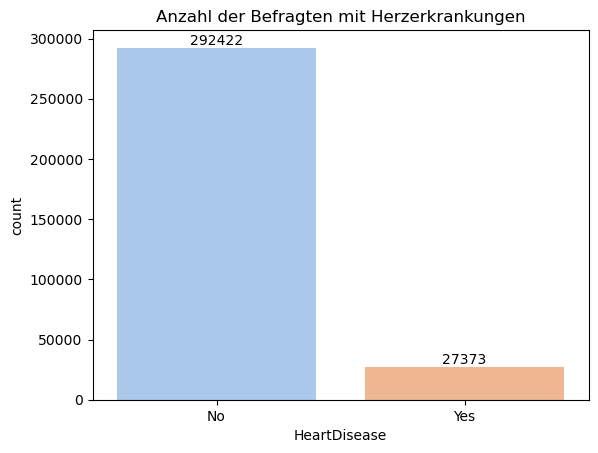

In [12]:
# Anzahl der Befragten mit Herzerkrankungen

ax = sns.countplot(x='HeartDisease', data=df, palette='pastel')
ax.set(title='Anzahl der Befragten mit Herzerkrankungen')
for container in ax.containers:
    ax.bar_label(container)


In [13]:
# Durchschnittlicher BMI nach Altersgruppe

bmi_by_age = df.groupby("AgeCategory")["BMI"].mean().reset_index()

color_scale = alt.Scale(
    domain=(24, 29),
    range=["#E5F5E0", "#2CA25F", "#006D2C"],
)

chartBMI = alt.Chart(bmi_by_age).mark_bar().encode(
    x=alt.X('AgeCategory', title='Alterskategorie', axis=alt.Axis(labelFontSize=14, labelAngle=45)),
    y=alt.Y("BMI", title="Durchschnittlicher BMI", axis=alt.Axis(labelFontSize=14, labelAngle=0), scale=alt.Scale(zero = False)),
    color=alt.Color("BMI", title="Altersgruppe",scale=color_scale, legend=None)
).properties(
    width=700,
    height=400,
    title={
        "text": "Durchschnittlicher BMI nach Altersgruppe",
        "fontSize": 16,
        "fontWeight": "bold",
        "anchor": "start",
        "dx": 50,
        "offset": 20
    }
)

chartBMI


alt.Chart(...)

In [14]:
# BMI (Mittelwert, Standard Abweichung) pro Alterskategorie

data = (df.groupby('AgeCategory')['BMI']
    .agg(['mean', 'std'])
    .assign(error_lower = lambda df: df['mean'] - 2 * df['std'],
            error_upper = lambda df: df['mean'] + 2 * df['std'])
    .reset_index())

error_bars = alt.Chart(data).mark_rule().encode(
    x='AgeCategory',
    y='error_lower',
    y2='error_upper')

means = alt.Chart(data).mark_circle(color='black').encode(
    x=alt.X('AgeCategory', title='Alterskategorie', axis=alt.Axis(labelFontSize=14, labelAngle=-45, labelPadding=14)),
    y=alt.Y("mean", title="Durchschnittlicher BMI", axis=alt.Axis(labelFontSize=14, labelAngle=0))
).properties(
    width=700,
    height=400,
    title={
        "text": "BMI (Mittelwert, Standard Abweichung) pro Alterskategorie",
        "fontSize": 16,
        "fontWeight": "bold",
        "anchor": "start",
        "dx": 50,
        "offset": 20
    }
)

error_bars + means

alt.LayerChart(...)

In [15]:
# Anzahl der BMIs mit Werten größer als 20, 25, 30 und 35

bmi_over_20 = df.loc[df["BMI"] > 20, "BMI"].count()
bmi_over_25 = df.loc[df["BMI"] > 25, "BMI"].count()
bmi_over_30 = df.loc[df["BMI"] > 30, "BMI"].count()
bmi_over_35 = df.loc[df["BMI"] > 35, "BMI"].count()

data = pd.DataFrame({
    "BMI": [">20", ">25", ">30", ">35"],
    "Anzahl": [bmi_over_20, bmi_over_25, bmi_over_30, bmi_over_35]
})

chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('BMI', title='Alterskategorie', axis=alt.Axis(labelFontSize=14, labelAngle=0)),
    y=alt.Y("Anzahl", title="Durchschnittlicher BMI", axis=alt.Axis(labelFontSize=14, labelAngle=0))
).properties(
    width=700,
    height=400,
    title={
        "text": "Anzahl der BMIs mit Werten größer als 20, 25, 30 und 35",
        "fontSize": 16,
        "fontWeight": "bold",
        "anchor": "start",
        "dx": 50,
        "offset": 20
    }
)

chart



alt.Chart(...)

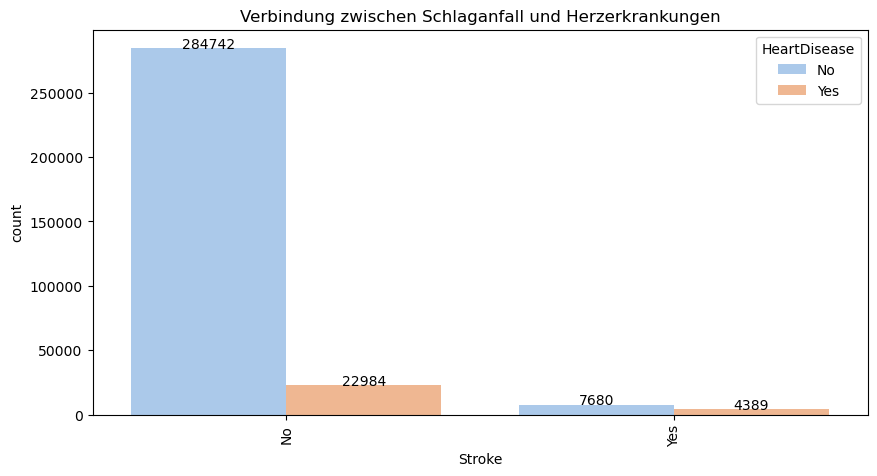

In [16]:
# Herzerkrankungen und Schlaganfall

fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x = df["Stroke"] , data = df,hue='HeartDisease',palette='pastel')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1, height, ha="center")

graph.set(title='Verbindung zwischen Schlaganfall und Herzerkrankungen')
plt.show()

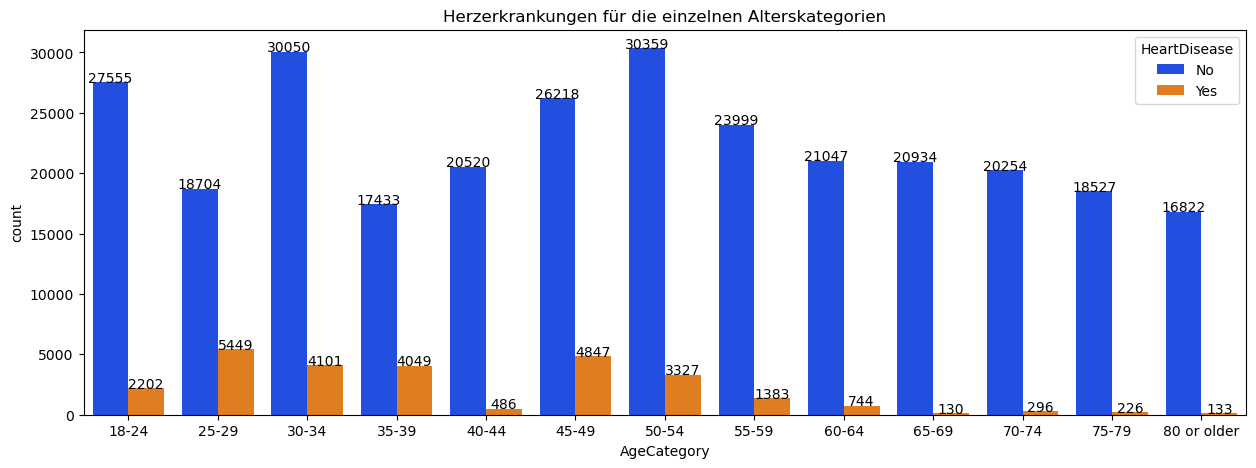

In [46]:
# Herzerkrankungen für die einzelnen Alterskategorien

categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
              '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

fig, ax1 = plt.subplots(figsize=(15,5))
graph = sns.countplot(ax=ax1,x = df["AgeCategory"] , data = df,hue='HeartDisease',palette='bright')
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1, height, ha="center")

graph.set(title='Herzerkrankungen für die einzelnen Alterskategorien')
graph.set_xticklabels(categories, rotation=0)
plt.show()

      Sex        BMI
0  Female  28.162436
1    Male  28.505317


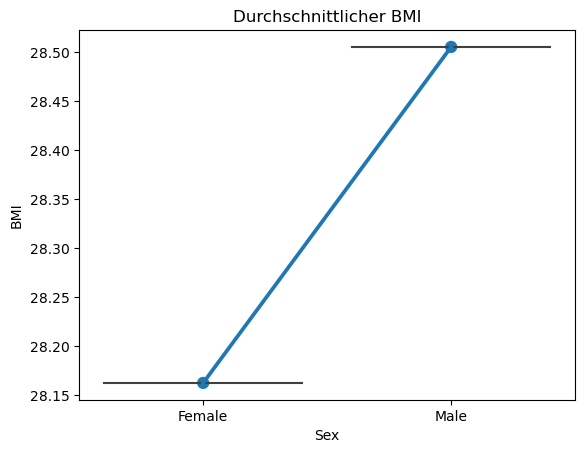

In [18]:
# Durchschnitt BMI für Männer und Frauen
avg_bmi_by_sex = df.groupby('Sex')['BMI'].mean().reset_index()
print(avg_bmi_by_sex)

sns.violinplot(x='Sex', y='BMI', data=avg_bmi_by_sex)
sns.pointplot(x='Sex', y='BMI', data=avg_bmi_by_sex, ci='sd').set(title='Durchschnittlicher BMI')
plt.show()

                  Diabetic   count
0                       No  269653
1  No, borderline diabetes    6781
2                      Yes   40802
3   Yes (during pregnancy)    2559


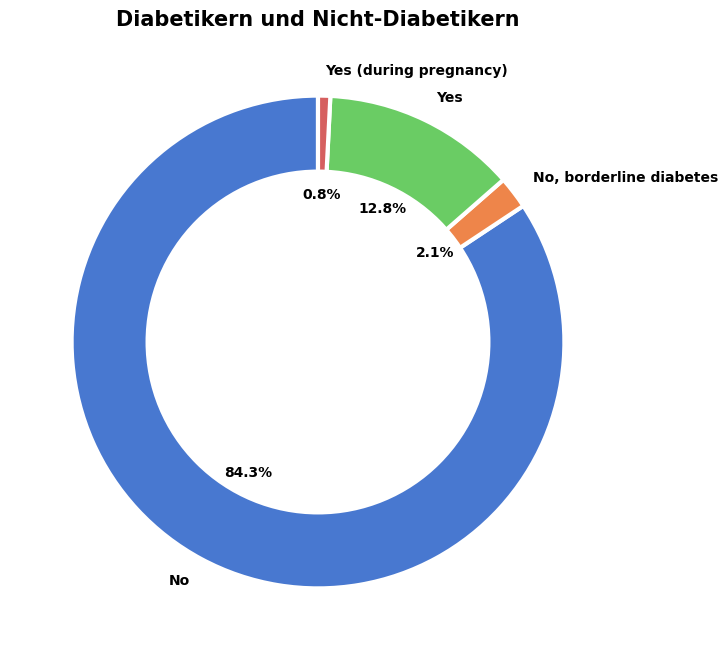

In [19]:
# Summe von Diabetikern und Nicht-Diabetikern
diabetic_count = df.groupby('Diabetic').size().reset_index(name='count')
print(diabetic_count)

plt.figure(figsize=(8, 8))
ax = sns.color_palette("muted")
wedges, texts, autotexts = plt.pie(diabetic_count['count'], labels=diabetic_count['Diabetic'], 
                                   colors=sns.color_palette("muted"), autopct='%1.1f%%',
                                   wedgeprops={'linewidth': 3, 'edgecolor': 'white'}, startangle=90, 
                                   textprops=dict(color="black", fontsize=10, weight='bold'))
plt.setp(autotexts, size=10, weight='bold')
plt.title('Diabetikern und Nicht-Diabetikern', fontsize=15, weight='bold')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

12b.) Welche Erkenntnisse können Sie aus den verschiedenen Plots entnehmen?

Anzahl der Befragten mit Herzerkrankungen:
Etwas mehr als 1/10 der Befragten haben Herzerkrankungen.

Durchschnittlicher BMI nach Altersgruppe:
Die mittleren Alterskategorien haben den höchsten durchschnittlichsten BMI.

BMI (Mittelwert, Standard Abweichung) pro Alterskategorie:
Mit zunehmenderen Alter nimmt die Streueung des BMIs leicht ab. In den mittleren Alterskategorien bleibt die Streuung relativ konstant. Generell kann man sagen, dass die Streuung doch relativ hoch ist, dies lässt darauf schließen, dass darauf geachtet wurde, viele Personen mit unterschiedlichen Körpergewicht zu befragen.

Verbindung zwischen Schlaganfall und Herzerkrankungen:
Der Plot zeigt sehr gut, dass die Wahrscheinlichkeit auf Herzerkrankungen zunimmt, sobald man einen Schlaganfall erlitten hat. Da das Verhältnis zwischen Personen mit Herzerkrankungen und ohne Herzerkrankungen viel geringer ist, für Personen die angegeben haben, dass sie bereits einen Schlaganfall erlitten haben.

Herzerkrankungen für die einzelnen Alterskategorien:
Je höher die Altersgruppe ist, desto weniger Personen mit Herzerkrankungen gibt es. Dies könnte sich damit begründen lassen, dass Personen mit Herzproblemen im Schnitt kein hohes Alter erreichen. In der Altersgruppe 40-44 gibt es ebenfalls unter den Befragten relativ gesehen eher wenige Personen mit Herzerkrankungen, dies könnte an der Stichprobe der ausgewählten Personen liegen.

Durchschnitt BMI für Männer und Frauen:
Der durchschnittliche BMI bei Männern ist höher als bei Frauen.

Summe von Diabetikern und Nicht-Diabetikern:
Zugegebener Maßen ist der gewählte Ring nicht Ideal zur Veranschaulichung der Daten, jedoch sehe ich als Ziel dieses Projekt auch die Übung und das Ausprobieren verschiedener Techniken. 
Der größte Teil der Befragten sind keine Diabetiker. 





### Erstellung einer passenden interaktiven Visualisierung

13) Gehen Sie zurück zu Ihren eingegangs gestellten Fragen, die für diesen Datensatz beantwortet werden sollen und fokussieren Sie sich auf mindestens zwei verschiedene Fragen. 
* a) Welche Visualisierungstechnik(en) und Interaktionstechnik würde(n) sich für die Beantwortung der jeweiligen Frage eignen und warum? 
* b) Fertigen Sie jeweils pro Frage (zwei ausgewählte reichen) eine Skizze mit der Visualisierungstechnik an (mit Benennung der Visualisierungstechnik und Beschriftung der Achsen/Legenden) - kann ins Notebook geladen werden oder zur Not extra abgegeben
* c) Überprüfen Sie: passt die Visualisierungstechnik zur gestellten Frage und dem gegebenen Datensatz? (Limitationen Farbe etc. beachten) oder kommen Alternativen in Frage? Wie müsste die Visualisierung unter Umständen angepasst (hier z.B. Anzahl der Kategorien und Wertebereich der Daten genau anschauen)

14) Erstellen Sie eine komplexere interaktive Visualisierung zur Beantwortung einer der gestellten Fragen und fügen Sie mindestens eine einfache Interaktion (z.B. Tooltip) hinzu! 

*Erklärung: komplexere Visualisierungen gehen über die Standardvisualisierung wie Barchart, Linechart, Scatterplot hinaus, also z.B. Dimensionsreduktion, geografische Darstellung auf Karte, Small Multiples - sollte eine solche Darstellung nicht möglich sein mit dem Datensatz dann versuchen Sie eine komplexere Interaktion einzubauen, z.B. Brushing&Linking oder Filter*

15) Können Sie die eingangs gestellte Frage beantworten? Welche Erkenntnisse über die Daten ergeben sich bei der Interaktion mit der Visualsierung?